<a href="https://colab.research.google.com/github/Kekoez/Funji-BOT/blob/main/FUNJI_BOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook wandb
import fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 37.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.8 MB/s eta 0:

In [2]:
from fastbook import *
from fastai.vision.widgets import *
from fastai.callback.wandb import WandbCallback
from fastai.callback.tracker import SaveModelCallback
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from plotnine import *
import shutil

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = Path('/content/drive/MyDrive/Mushroom ')

In [5]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(256, method=ResizeMethod.Squish),
    batch_tfms=aug_transforms(size=256, flip_vert=True,),
    )
dls = dblock.dataloaders(path, bs=45)

In [6]:
# set seed for reproducability
set_seed(4,True)
dls.rng.seed(4)

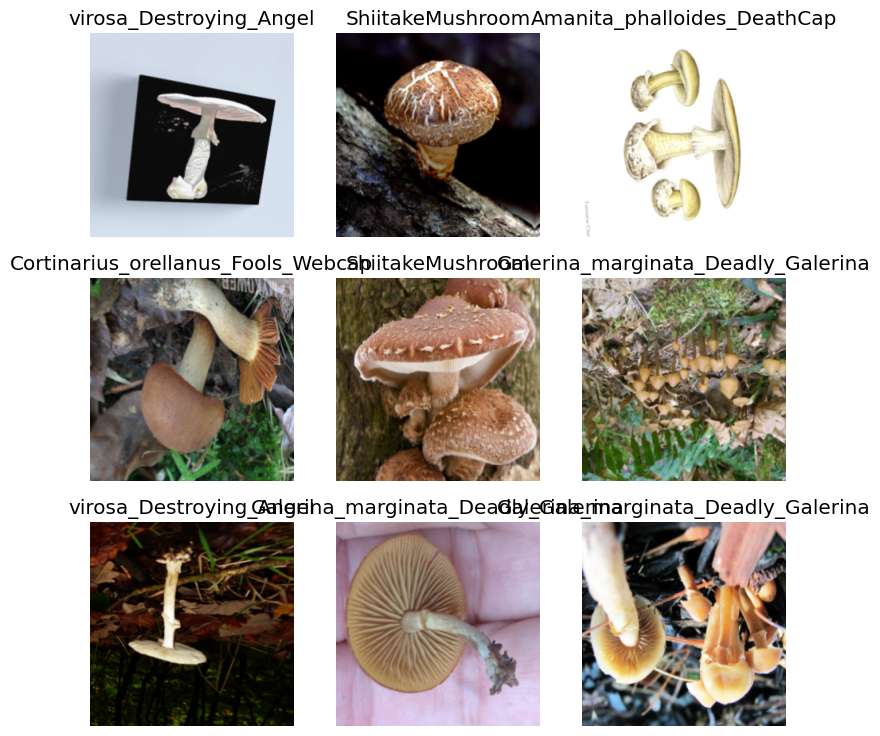

In [7]:
dls.train.show_batch(max_n=9, nrows=3)

In [8]:
from fastai.learner import *

In [9]:
# import torchvision.models as models
# mobilenet = models.mobilenet_v2(pretrained=True)
# def _mobilenet_v2_split(m:nn.Module): return L(m[0][0][:7],m[0][0][7:], m[1:]).map(params)
# _mobilenet_v2_meta   = {'cut':-1, 'split':_mobilenet_v2_split, 'stats':imagenet_stats}
# model_meta[models.mobilenet_v2] = {**_mobilenet_v2_meta}

In [10]:
learn = cnn_learner(dls,
                      resnet50,
                    metrics=[accuracy, Precision(average='weighted'), Recall(average='weighted'), F1Score(average='weighted')]).to_fp16()

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 226MB/s]


In [11]:
learn.fine_tune(epochs=5,
          base_lr=1e-3, #max lr; when unfrozen base_lr/2
          freeze_epochs=1, #how many epochs to train frozen
          )

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,2.375710,1.253181,0.614232,0.610242,0.614232,0.604503,05:11


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,1.338630,1.106385,0.674157,0.677142,0.674157,0.662039,01:11
1,1.138347,0.937726,0.696629,0.694871,0.696629,0.694145,01:16
2,0.915564,0.964177,0.698502,0.710500,0.698502,0.687479,01:12
3,0.722673,0.883309,0.715356,0.712043,0.715356,0.710316,01:13
4,0.565923,0.857961,0.709738,0.708503,0.709738,0.707182,01:10


In [12]:
interp = ClassificationInterpretation.from_learner(learn)

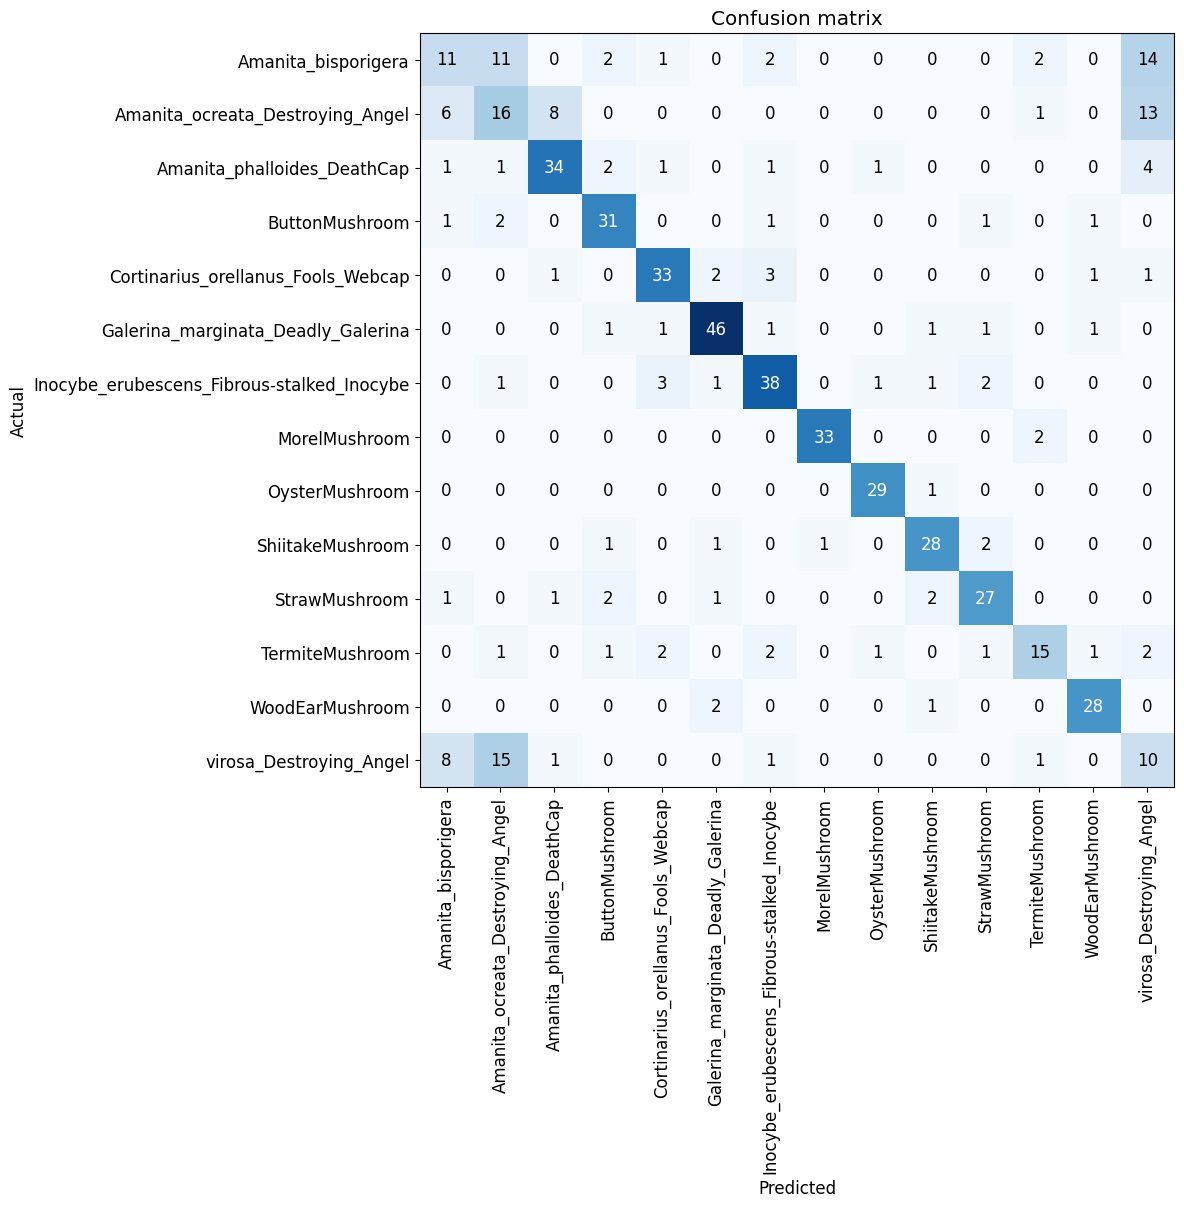

In [13]:
interp.plot_confusion_matrix(figsize=(12, 12))

In [14]:
def predict(img):
    # make prediction
    pred, pred_idx, pred_prob = learn.predict(img)
    print(pred,pred_prob[pred_idx])

In [16]:
import time
start_time = time.time()
predict('/content/Amanita bis.jpg')
print("--- %s seconds ---" % (time.time() - start_time))

Amanita_ocreata_Destroying_Angel tensor(0.6312)
--- 0.660306453704834 seconds ---


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


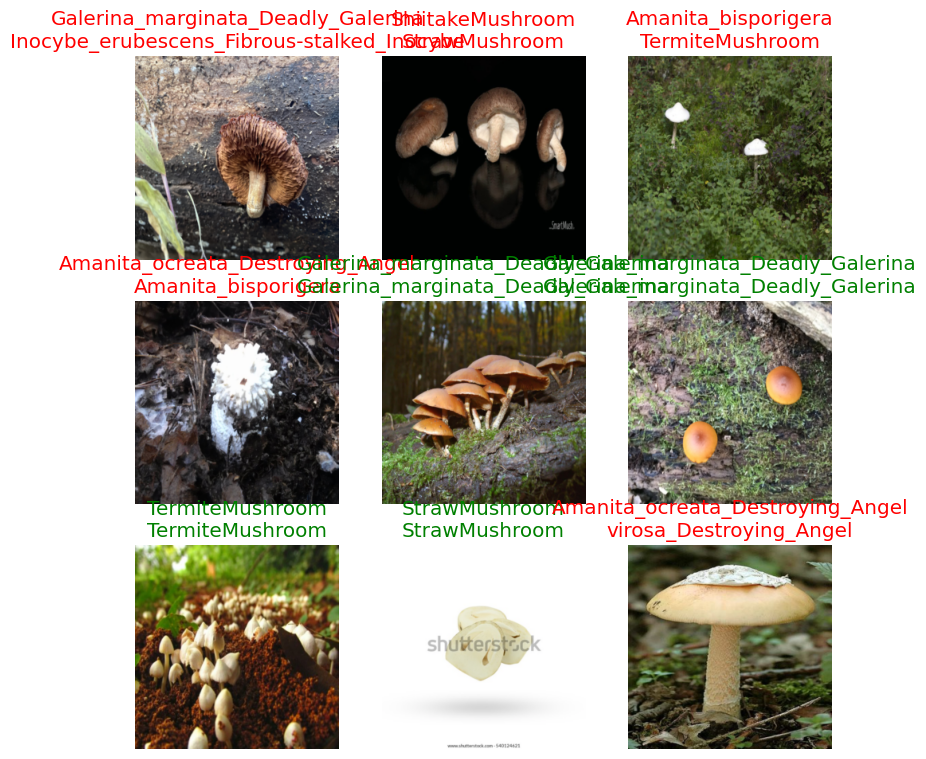

In [17]:
learn.show_results()

In [18]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [19]:
learn_inf = load_learner(path/'export.pkl')

In [22]:
#upload button
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [24]:
#image
img = PILImage.create(btn_upload.data[-1])

In [25]:
#display as 128 * 128
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [26]:
#get prediction
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Amanita_ocreata_Destroying_Angel; Probability: 0.6315')

In [27]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run = widgets.Button(description='Classify Cookies')
btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()

In [28]:
VBox([widgets.Label('Select your cookies!'),
      btn_upload, btn_run, out_pl, lbl_pred])